#Setup

In [ ]:
# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn

import warnings 
warnings.filterwarnings("ignore")

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#File extraction
from zipfile import ZipFile
from urllib.request import urlopen
import io

#Get the data

Extracting column names from website

In [ ]:
colnames = ["duration","protocol_type","service","flag",
            "src_bytes","dst_bytes","land","wrong_fragment",
            "urgent","hot","num_failed_logins","logged_in",
            "num_compromised","root_shell","su_attempted",
            "num_root","num_file_creations","num_shells",
            "num_access_files","num_outbound_cmds",
            "is_host_login","is_guest_login","count",
            "srv_count","serror_rate","srv_serror_rate",
            "same_srv_rate","diff_srv_rate","srv_diff_host_rate",
            "una1","una2","dst_host_count","dst_host_srv_count",
            "dst_host_same_srv_rate","dst_host_diff_srv_rate",
            "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
            "dst_host_serror_rate","dst_host_srv_serror_rate",
            "dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]

In [ ]:
f = urlopen('https://raw.githubusercontent.com/AkshatGarg7/DDOS-Detection-using-Machine-Learning/master/Dataset/dataset.zip').read()
zip_file = ZipFile(io.BytesIO(f))
train_df = pd.read_csv(zip_file.open('kddcup.csv'),header = None,names = colnames)
#print("train_df shape -> ",train_df.shape)
test_df = pd.read_csv(zip_file.open('corrected.csv'),header = None,names = colnames)
# print("test_df shape -> ",test_df.shape)

#Data Manpulation and Analysis using Pandas framework

In [ ]:
frames = [train_df,test_df]
df = pd.concat(frames)
print("Shape of Dataset: ",df.shape)

Shape of Dataset:  (805050, 42)


In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,805050.000000,8.050500e+05,8.050500e+05,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.0,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000,805050.000000
mean,36.359298,2.525712e+03,8.219626e+02,0.000039,0.004242,0.000029,0.026853,0.001006,0.157608,0.010611,0.000145,0.000031,0.010196,0.001035,0.000099,0.000917,0.0,0.000015,0.001787,307.930861,270.758604,0.131302,0.131246,0.090332,0.090376,0.800861,0.022321,0.027588,233.557149,192.733230,0.769123,0.028606,0.581066,0.005865,0.131169,0.130988,0.090780,0.089974
std,609.751312,7.781862e+05,2.775406e+04,0.006205,0.108576,0.007476,0.642713,0.033383,0.364373,1.861771,0.012055,0.007136,2.072957,0.141821,0.011795,0.033939,0.0,0.003861,0.042241,217.927765,245.230221,0.336674,0.337131,0.285153,0.285685,0.382048,0.092618,0.136034,63.307144,103.989036,0.402258,0.104378,0.486165,0.039810,0.335943,0.336595,0.283095,0.283886
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.100000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,103.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,114.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,469.000000,458.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.030000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.203179e+06,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,100.000000,5.000000,8.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print('Null values in dataset are: ',len(df[df.isnull().any(1)]))

Null values in dataset are:  0


In [ ]:
attack_normal = df["result"].values
attack_normal = set(attack_normal)
print("Different type of attacks/normal are:\n ",attack_normal)
print("No. of different attacks/normal are: ",len(attack_normal))

Different type of attacks/normal are:
  {'portsweep.', 'satan.', 'teardrop.', 'multihop.', 'smurf.', 'nmap.', 'mailbomb.', 'spy.', 'normal.', 'warezclient.', 'xterm.', 'worm.', 'imap.', 'land.', 'neptune.', 'processtable.', 'rootkit.', 'udpstorm.', 'ps.', 'httptunnel.', 'sendmail.', 'mscan.', 'xsnoop.', 'phf.', 'guess_passwd.', 'pod.', 'xlock.', 'named.', 'snmpguess.', 'snmpgetattack.', 'ipsweep.', 'apache2.', 'perl.', 'warezmaster.', 'ftp_write.', 'saint.', 'buffer_overflow.', 'sqlattack.', 'loadmodule.', 'back.'}
No. of different attacks/normal are:  40


In [ ]:
print(pd.Series(df.result.value_counts(ascending=False)))

smurf.              444881
neptune.            165202
normal.             157871
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4420
back.                 3301
satan.                3222
snmpguess.            2406
warezmaster.          1622
ipsweep.              1553
portsweep.            1394
mscan.                1053
warezclient.          1020
teardrop.              991
apache2.               794
processtable.          759
saint.                 736
pod.                   351
nmap.                  315
httptunnel.            158
buffer_overflow.        52
land.                   30
multihop.               25
rootkit.                23
named.                  17
sendmail.               17
ps.                     16
xterm.                  13
imap.                   13
loadmodule.             11
ftp_write.              11
xlock.                   9
phf.                     6
perl.                    5
xsnoop.                  4
spy.                     2
s

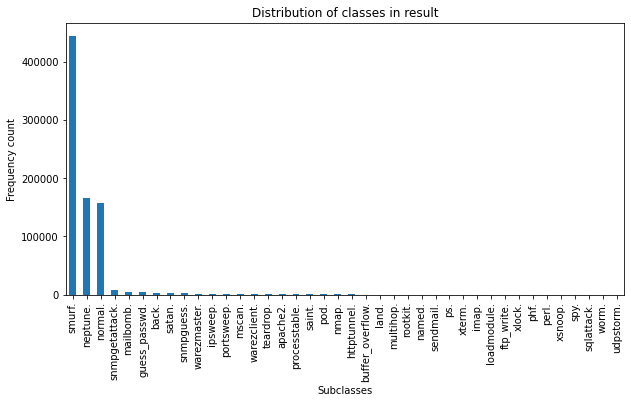

In [ ]:
df['result'].value_counts().plot(kind ='bar',figsize = (10,5), 
                                        title= 'Distribution of classes in result',
                                        xlabel = 'Subclasses',
                                        ylabel='Frequency count')

In [ ]:
# print(pd.Series(df.protocol_type.value_counts(ascending=True)))

Dropping duplicate values

In [ ]:
df_new = df.copy()
df_new.drop_duplicates(subset=colnames, keep='first', inplace = True)
# print("Shape of Dataset before dropping duplicates: ",df.shape)
print("Shape of Dataset after dropping duplicates: ",df_new.shape)

Shape of Dataset after dropping duplicates:  (215601, 42)


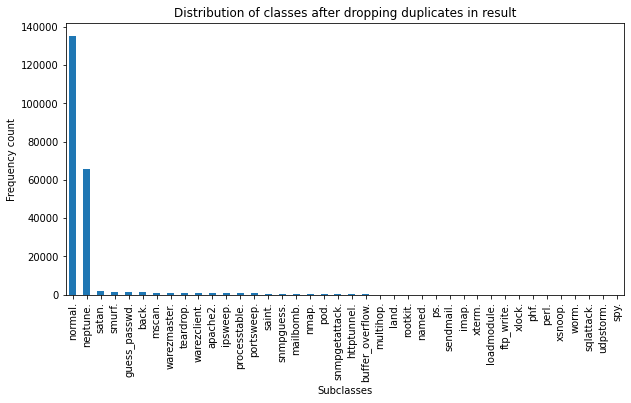

In [ ]:
df_new['result'].value_counts().plot(kind ='bar',figsize = (10,5), 
                                        title= 'Distribution of classes after dropping duplicates in result',
                                        xlabel = 'Subclasses',
                                        ylabel='Frequency count')

In [ ]:
print("Percentage distribution of classes in the output classes.")
(df_new['result'].value_counts() / df_new.shape[0]) * 100

Percentage distribution of classes in the output classes.


normal.             62.771508
neptune.            30.431213
satan.               0.814004
smurf.               0.640999
guess_passwd.        0.628476
back.                0.618272
mscan.               0.486547
warezmaster.         0.474024
teardrop.            0.429961
warezclient.         0.414191
apache2.             0.368273
ipsweep.             0.346937
processtable.        0.345082
portsweep.           0.269479
saint.               0.168830
snmpguess.           0.166511
mailbomb.            0.142856
nmap.                0.110389
pod.                 0.105287
snmpgetattack.       0.083024
httptunnel.          0.067254
buffer_overflow.     0.024119
multihop.            0.011595
land.                0.011132
rootkit.             0.010668
named.               0.007885
ps.                  0.007421
sendmail.            0.006957
imap.                0.006030
xterm.               0.006030
loadmodule.          0.005102
ftp_write.           0.005102
xlock.               0.004174
phf.      

####As per the above plot we can see that class `normal.` and `neptune.` has the highest distritbution. And rest all classes has the very low distribution. This makes it a class imbalance problem.

Checking type of data for all the features

In [ ]:
numerical_attr = []
categorical_attr = []
for feature,datatype in zip(df_new.columns,df_new.dtypes):
    if datatype != 'object':
        numerical_attr.append(feature)
    else:
        categorical_attr.append(feature)
print("Numerical attributes: \n", numerical_attr)
print("\nNumerical attributes count: ", len(numerical_attr))
print("-"*50)
print("Categorical attributes: \n", categorical_attr)
print("\nCategorical attributes count: ", len(categorical_attr))

Numerical attributes: 
 ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'una1', 'una2', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

Numerical attributes count:  38
--------------------------------------------------
Categorical attributes: 
 ['protocol_type', 'service', 'flag', 'result']

Categorical attributes count:  4


The data has 38 numerical attributes and 4 categorical attributes.

In [ ]:
df_new.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,215601.000000,2.156010e+05,2.156010e+05,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.0,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000
mean,114.518235,6.621398e+03,2.957882e+03,0.000116,0.014416,0.000107,0.081827,0.002699,0.540828,0.030510,0.000543,0.000116,0.038070,0.003864,0.000371,0.003404,0.0,0.000056,0.006591,68.462758,14.796457,0.219084,0.219373,0.130319,0.130018,0.698817,0.042079,0.097444,178.081043,143.526194,0.606005,0.055959,0.088386,0.018167,0.218609,0.218432,0.131321,0.128572
std,1118.322841,1.503680e+06,5.356371e+04,0.010768,0.201815,0.014447,1.225385,0.055681,0.498331,3.596264,0.023289,0.013790,4.005555,0.274029,0.022789,0.065377,0.0,0.007460,0.080916,100.507527,39.910056,0.411002,0.412187,0.333163,0.333438,0.433343,0.137843,0.240888,99.946140,114.235103,0.449320,0.144977,0.234827,0.056154,0.408912,0.410817,0.326935,0.328127
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,71.000000,13.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000e+02,2.600000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,194.000000,0.980000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.940000e+02,1.460000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,122.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.060000,0.020000,255.000000,255.000000,1.000000,0.060000,0.030000,0.020000,0.010000,0.010000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.203179e+06,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,100.000000,5.000000,8.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
def range_num(series):
    return series.max() - series.min()
def outliers(series):
    outliers_count = 0
    iqr = series.quantile(.75) - series.quantile(.25)
    iqr_upperbound = series.quantile(.75) + iqr*1.5
    iqr_lowerbound = series.quantile(.25) - iqr*1.5
    for oneValue in series.values:
        if oneValue > iqr_upperbound or oneValue < iqr_lowerbound:
            outliers_count += 1
    return outliers_count
def outliersPercentage(series):
    outliers_count = 0
    iqr = series.quantile(.75) - series.quantile(.25)
    iqr_upperbound = series.quantile(.75) + iqr*1.5
    iqr_lowerbound = series.quantile(.25) - iqr*1.5
    for oneValue in series.values:
        if oneValue > iqr_upperbound or oneValue < iqr_lowerbound:
            outliers_count += 1
    return (outliers_count/series.size) * 100
print("Summary for quantitative attributes.")
# using aggregate function to get mean, median, standard deviation and range
num_summary = df_new.agg(
    {
        col : ["mean", "median", "std", "min","max",range_num, outliers, outliersPercentage] for col in numerical_attr
    }
)
num_summary

Summary for quantitative attributes.


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
mean,114.518235,6.621398e+03,2.957882e+03,0.000116,0.014416,0.000107,0.081827,0.002699,0.540828,0.030510,0.000543,0.000116,0.038070,0.003864,0.000371,0.003404,0.0,0.000056,0.006591,68.462758,14.796457,0.219084,0.219373,0.130319,0.130018,0.698817,0.042079,0.097444,178.081043,143.526194,0.606005,0.055959,0.088386,0.018167,0.218609,0.218432,0.131321,0.128572
median,0.000000,2.000000e+02,2.600000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,194.000000,0.980000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,1118.322841,1.503680e+06,5.356371e+04,0.010768,0.201815,0.014447,1.225385,0.055681,0.498331,3.596264,0.023289,0.013790,4.005555,0.274029,0.022789,0.065377,0.0,0.007460,0.080916,100.507527,39.910056,0.411002,0.412187,0.333163,0.333438,0.433343,0.137843,0.240888,99.946140,114.235103,0.449320,0.144977,0.234827,0.056154,0.408912,0.410817,0.326935,0.328127
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.203179e+06,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,100.000000,5.000000,8.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
range_num,58329.000000,6.933756e+08,5.203179e+06,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,100.000000,5.000000,8.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
outliers,15761.000000,1.863300e+04,2.874500e+04,25.000000,1202.000000,14.000000,3104.000000,557.000000,0.000000,1378.000000,117.000000,17.000000,642.000000,350.000000,70.000000,679.000000,0.0,12.000000,1421.000000,2552.000000,9816.000000,50523.000000,49376.000000,29479.000000,29667.000000,0.000000,6746.000000,52004.000000,0.000000,0.000000,0.000000,9991.000000,35816.000000,14340.000000,51164.000000,48365.000000,38912.000000,35530.000000
outliersPercentage,7.310263,8.642353e+00,1.333250e+01,0.011595,0.557511,0.006493,1.439696,0.258348,0.000000,0.639144,0.054267,0.007885,0.297772,0.162337,0.032467,0.314934,0.0,0.005566,0.659088,1.183668,4.552855,23.433565,22.901564,13.672942,13.760140,0.000000,3.128928,24.120482,0.000000,0.000000,0.000000,4.634023,16.612168,6.651175,23.730873,22.432642,18.048154,16.479515


#### Columns with range greater than 1

In [ ]:
num_standardization_cols = []
for col in num_summary.columns:
    if num_summary.loc['range_num',col] > 1:
        num_standardization_cols.append(col)

print("Numbers of columns with range greater than 1: ", len(num_standardization_cols))
num_standardization_cols

Numbers of columns with range greater than 1:  17


['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'count',
 'srv_count',
 'dst_host_count',
 'dst_host_srv_count']

#### From summary of numerical attributes following are the obervations.
* Data has potential outlier based on IQR.
* 10 columns have range of 1 i.e. we can skip standardization for these attributes.
* Rest columns can be standardized.

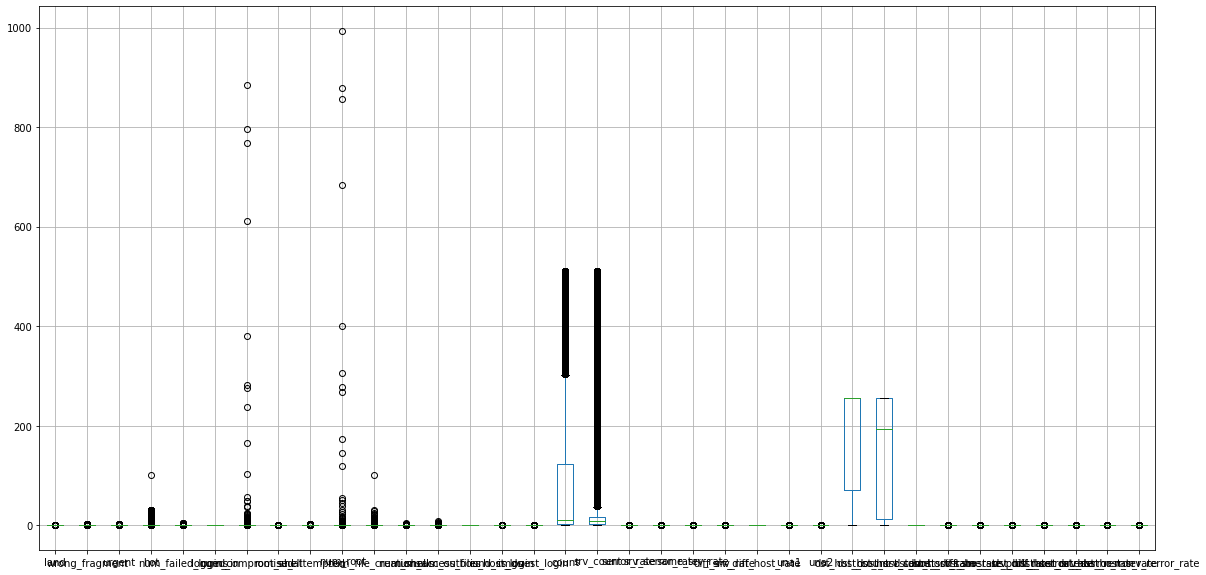

In [ ]:
df_new.boxplot(column = numerical_attr[3:],figsize=(20,10))

#### Checking distribution of categorical features

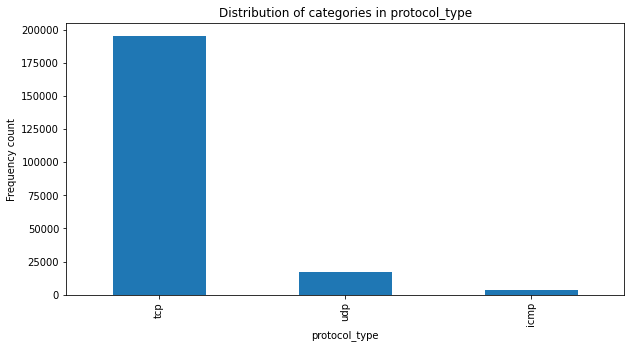

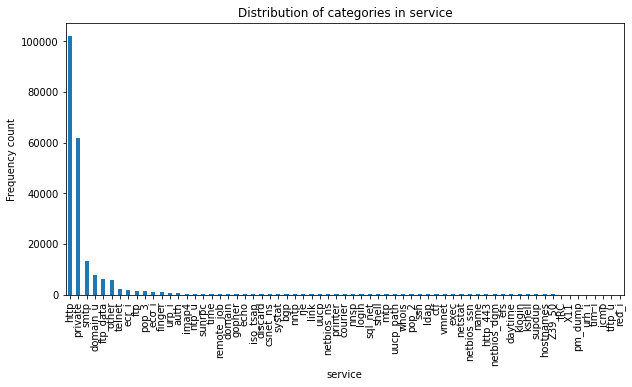

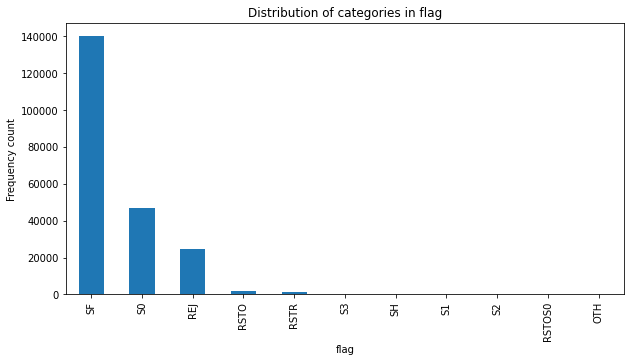

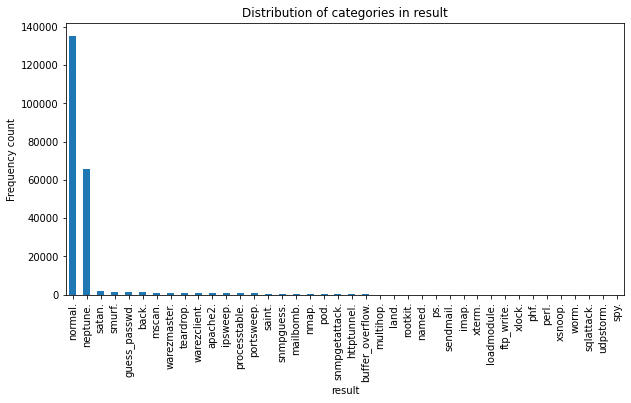

In [ ]:
for col in categorical_attr:
    df_new[col].value_counts().plot(kind ='bar',figsize = (10,5), 
                                        title= 'Distribution of categories in ' + col,
                                        xlabel = col,
                                        ylabel='Frequency count')
    plt.show()

#### It can be seen that categorical data is highly imbalanced.
* In `protocol_type`, `tcp` has the highest distribution, and rest other classes have very low ditribution.
* In `service`, `http` and `private` has the highest distribution, and rest other classes have very low ditribution.
* In `flag`, `S0` and `SF` has the highest distribution, and rest other classes have very low ditribution.
* In `result`, `normal.` and `neptune.` has the highest distribution, and rest other classes have very low ditribution.

#### Subcategories count in categorical data

In [ ]:
for col in categorical_attr:
    print("Subcategories in ", col, " : ", len(df_new[col].unique()))
    print("-"*40)

Subcategories in  protocol_type  :  3
----------------------------------------
Subcategories in  service  :  67
----------------------------------------
Subcategories in  flag  :  11
----------------------------------------
Subcategories in  result  :  40
----------------------------------------


#### For the columns `service` and `flag` has high number of subcategorices. On preprocessing these categorical attributes by converting them to numerical value using one hot encoding will result in adding a column per subcategory. In this case it would result in adding `66 + 11 + 3  - 3 = 77` columns. This would add to the complexity of the model. We will use baseN encoding which will highly reduce the dimentionality as the value of N is increased.

In [ ]:
df_new.groupby(['protocol_type']).agg({'result': 'value_counts'})

result
protocol_type result                  
icmp          smurf.              1382
              normal.             1036
              ipsweep.             657
              pod.                 227
              nmap.                103
              saint.               101
              satan.                 4
              snmpguess.             3
              multihop.              1
              portsweep.             1
tcp           normal.           119542
              neptune.           65610
              guess_passwd.       1355
              back.               1333
              satan.              1243
              mscan.              1049
              warezmaster.        1022
              warezclient.         893
              apache2.             794
              processtable.        744
              portsweep.           580
              mailbomb.            308
              saint.               236
              httptunnel.          145
              nmap.                110
              ipsweep.              91
              buffer_overflow.      52
              land.                 24
              rootkit.              20
              named.                17
              multihop.             16
              ps.                   16
              sendmail.             15
              imap.                 13
              xterm.                13
              ftp_write.            11
              loadmodule.           11
              xlock.                 9
              phf.                   6
              perl.                  5
              xsnoop.                4
              spy.                   2
              sqlattack.             2
              worm.                  2
udp           normal.            14758
              teardrop.            927
              satan.               508
              snmpguess.           356
              snmpgetattack.       179
              saint.                27
              nmap.                 25
              multihop.              8
              rootkit.               3
              udpstorm.              2

### Feature selection

#### Checking correlation for the features

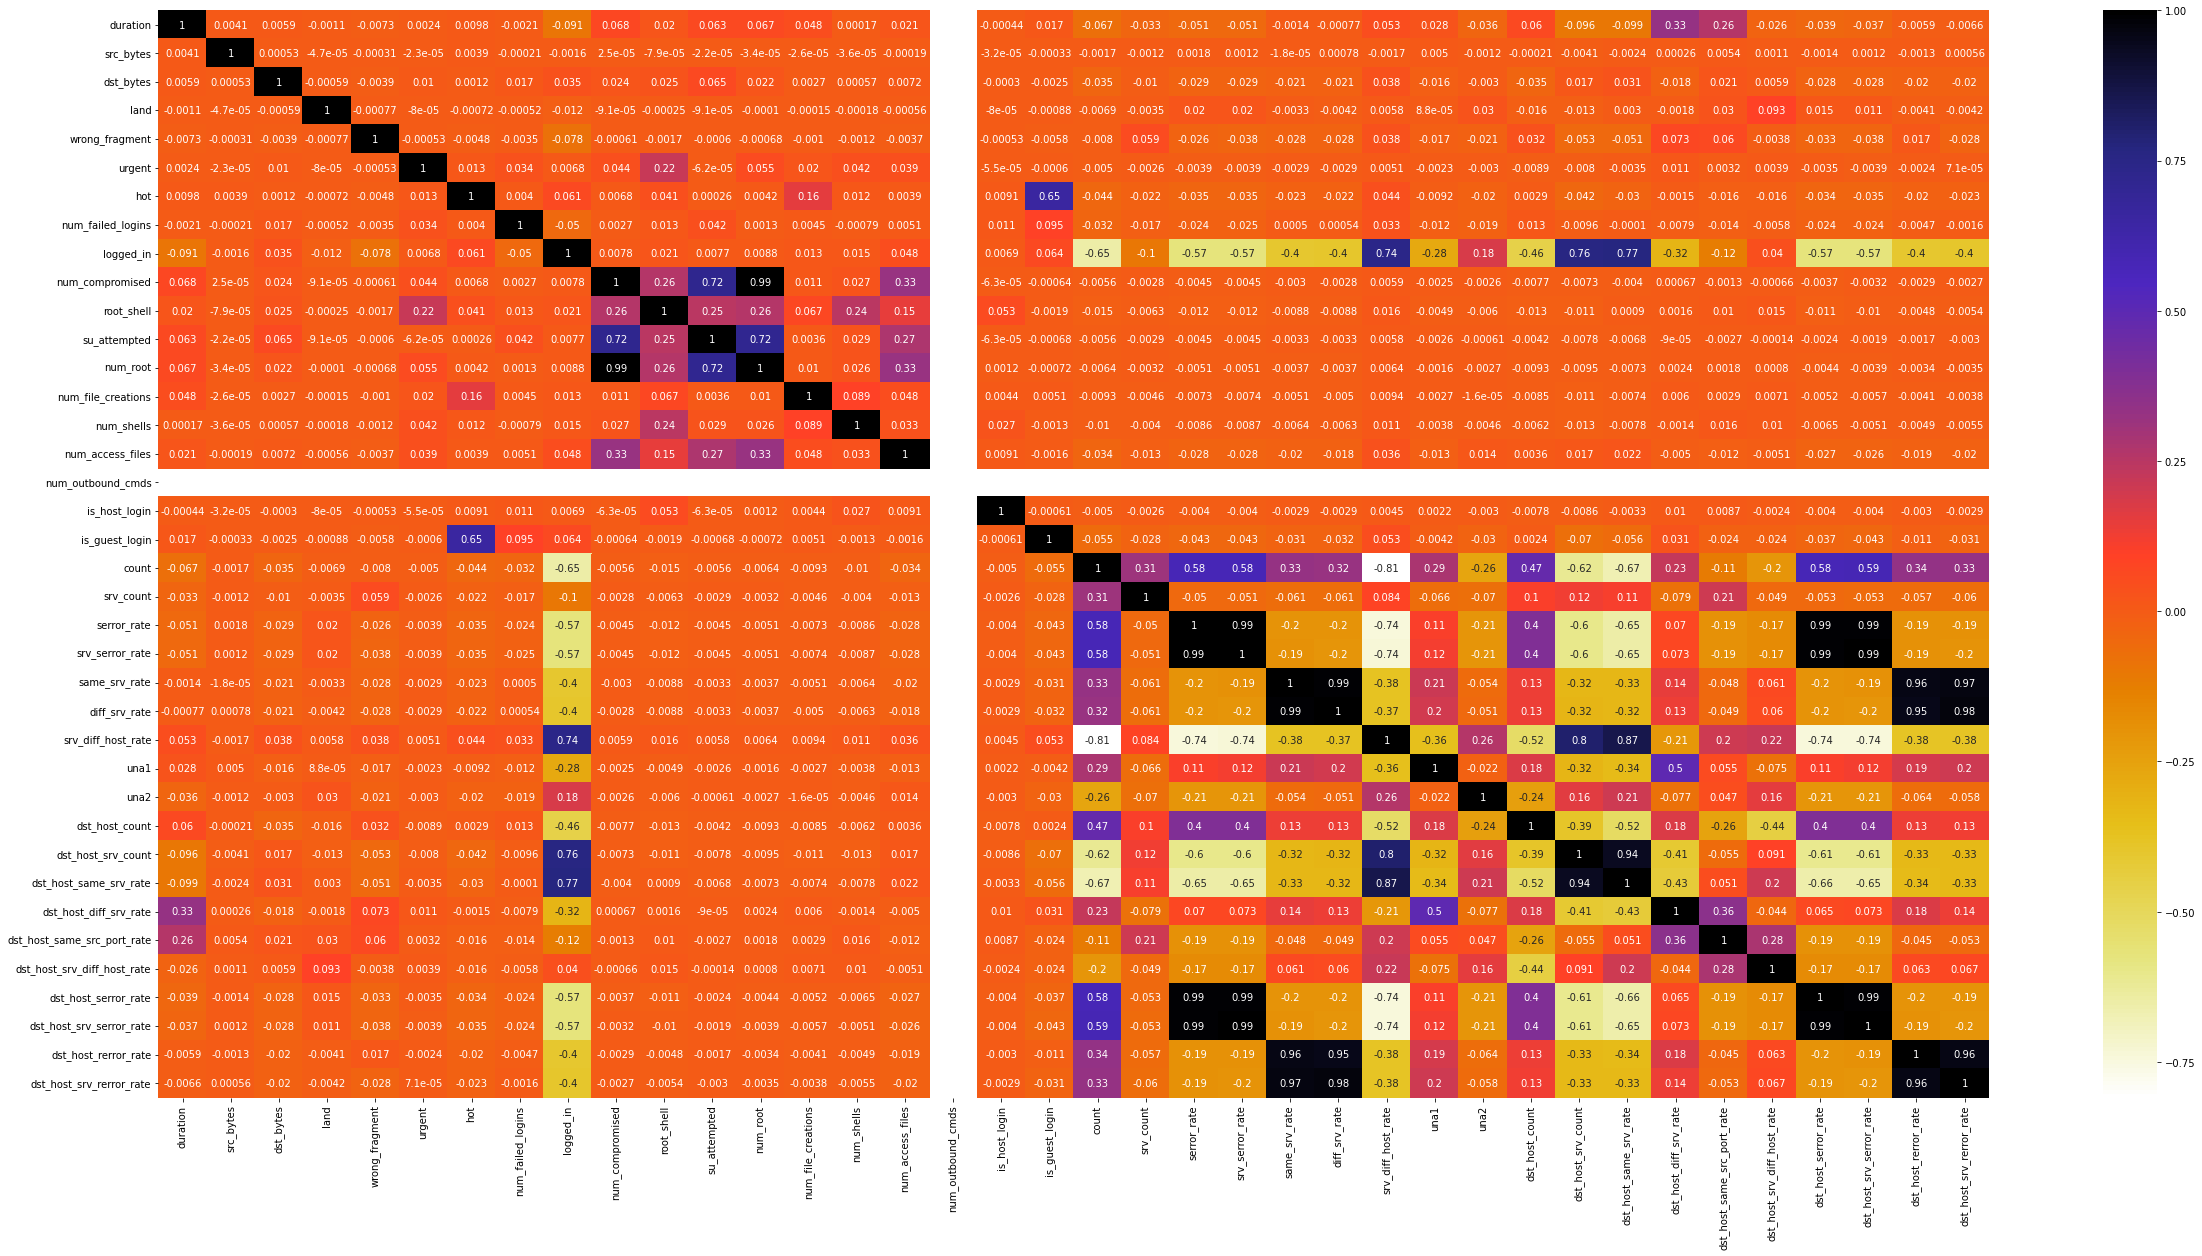

In [ ]:
plt.figure(figsize=(41,20))
cor = df_new.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

#### As per the correlation matrix above we can eliminate pairs with high correlation and consider only one feature from the pair of highly correlated features. For this problem we are using threshold correlation of 0.8.

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

#### Highly correlated feature from their pair

In [ ]:
corr_features = correlation(df_new, 0.8)
print("Number of highly correlated pairs: ",len(set(corr_features)))
print("-"*40)
print("One feature from each highly correlated pair: \n", corr_features)

Number of highly correlated pairs:  9
----------------------------------------
One feature from each highly correlated pair: 
 {'num_root', 'srv_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_same_srv_rate', 'diff_srv_rate', 'dst_host_rerror_rate', 'dst_host_srv_count'}


In [ ]:
# df_new = df_new.drop(corr_features,axis = 1)

In [ ]:
df_new.shape

(215601, 42)

#### Removing these features for model training

In [ ]:
for col in numerical_attr:
    if col in corr_features:
        numerical_attr.remove(col)

for col in num_standardization_cols:
    if col in corr_features:
        num_standardization_cols.remove(col)

In [ ]:
print("Numerical attributes after removing highly correlated featured: ", len(numerical_attr))

Numerical attributes after removing highly correlated featured:  32


In [ ]:
print("Numerical attributes for standardization after removing highly correlated featured: ", len(num_standardization_cols))

Numerical attributes for standardization after removing highly correlated featured:  15


### Preprocessing the data

#### Creating pipeline for categorical data preprocessing

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 338 kB/s 


In [ ]:
from sklearn.pipeline import Pipeline
import category_encoders as ce

categorical_attr_encoding = categorical_attr
categorical_attr_encoding.remove('result')
categorical_transformer = Pipeline(
    steps=[("base_encoding",ce.BaseNEncoder(base=2))])

#### Creating pipeline for numerical data preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

#### Creating full pipeline with numerical and categorical preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer(transformers=[
        ("num", numeric_transformer, num_standardization_cols),
        ("cat", categorical_transformer, categorical_attr_encoding),
        ("passthrough", "passthrough", list(set(numerical_attr) - set(num_standardization_cols)))
    ])

#### Transforming the data

In [ ]:
df_tf = full_pipeline.fit_transform(df_new)

#### Shape of the transformed data

In [ ]:
print("Number of rows: ",df_tf.shape[0])
print("Number of columns: ",df_tf.shape[1])

Number of rows:  215601
Number of columns:  45


#### Splitting the data into test and train

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(test_size=0.2,random_state=42,n_splits=1)

In [ ]:
X_train, X_test, y_train, y_test = (None, None, None, None)
for train_index, test_index in ss.split(df_tf, df_new['result']):
    X_train, X_test = df_tf[train_index], df_tf[test_index]
    y_train, y_test = df_new['result'].iloc[train_index], df_new['result'].iloc[test_index]

####  Data distribution after stratified sampling

In [ ]:
print("Percentage distribution in train split: ", (X_train.shape[0]/df_new.shape[0])*100)
print("-"*40)
print("Percentage distribution in test split: ", (X_test.shape[0]/df_new.shape[0])*100)
print("-"*40)
print("Percentage classes distribution on train split:\n",(y_train.value_counts()/df_new.shape[0])*100)
print("-"*40)
print("Percentage classes distribution on test split:\n",(y_test.value_counts()/df_new.shape[0])*100)

Percentage distribution in train split:  79.99962894420712
----------------------------------------
Percentage distribution in test split:  20.000371055792876
----------------------------------------
Percentage classes distribution on train split:
 normal.             50.216836
neptune.            24.344971
satan.               0.651203
smurf.               0.512985
guess_passwd.        0.502781
back.                0.494432
mscan.               0.389145
warezmaster.         0.379405
teardrop.            0.344154
warezclient.         0.331167
apache2.             0.294526
ipsweep.             0.277364
processtable.        0.275973
portsweep.           0.215676
saint.               0.134972
snmpguess.           0.133116
mailbomb.            0.114100
nmap.                0.088126
pod.                 0.084415
snmpgetattack.       0.066326
httptunnel.          0.053803
buffer_overflow.     0.019480
multihop.            0.009276
land.                0.008813
rootkit.             0.008349
n

####Balancing the dataset

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler
from collections import Counter
from imblearn.pipeline import Pipeline

counter = Counter(y_train)
print("before: ",counter)
smote = SMOTE()
ros = RandomOverSampler()
pipe = Pipeline([('randomoversampler',ros),('smote',smote)])
# oversample = SMOTE(random_state = 1)
X_train,y_train = pipe.fit_resample(X_train,y_train)
counter = Counter(y_train)
print("after: ",counter)

before:  Counter({'normal.': 108268, 'neptune.': 52488, 'satan.': 1404, 'smurf.': 1106, 'guess_passwd.': 1084, 'back.': 1066, 'mscan.': 839, 'warezmaster.': 818, 'teardrop.': 742, 'warezclient.': 714, 'apache2.': 635, 'ipsweep.': 598, 'processtable.': 595, 'portsweep.': 465, 'saint.': 291, 'snmpguess.': 287, 'mailbomb.': 246, 'nmap.': 190, 'pod.': 182, 'snmpgetattack.': 143, 'httptunnel.': 116, 'buffer_overflow.': 42, 'multihop.': 20, 'land.': 19, 'rootkit.': 18, 'named.': 14, 'ps.': 13, 'sendmail.': 12, 'xterm.': 10, 'imap.': 10, 'loadmodule.': 9, 'ftp_write.': 9, 'xlock.': 7, 'phf.': 5, 'perl.': 4, 'xsnoop.': 3, 'spy.': 2, 'udpstorm.': 2, 'sqlattack.': 2, 'worm.': 2})
after:  Counter({'normal.': 108268, 'neptune.': 108268, 'mscan.': 108268, 'processtable.': 108268, 'back.': 108268, 'teardrop.': 108268, 'satan.': 108268, 'httptunnel.': 108268, 'smurf.': 108268, 'snmpguess.': 108268, 'mailbomb.': 108268, 'apache2.': 108268, 'warezclient.': 108268, 'portsweep.': 108268, 'snmpgetattack.'

####Standardizing the Data

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()



for i in range(X_train_stand.shape[1]):
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

#Train the model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
models = [MLPClassifier(alpha=0.005)]
classifiers = ["ABC"]
scores = []

In [ ]:
for model in models:
  model.fit(X_train_stand,y_train)
  y_pred = model.predict(X_test_stand)
  score = accuracy_score(y_test, y_pred)*100
  scores.append(score)
  print("Accuracy of  model is: ", score)
  conf_matrix = confusion_matrix(y_test,y_pred)
  report = classification_report(y_test,y_pred)
  print("Confusion Matrix:\n",conf_matrix)
  print("Report:\n",report)
  print("\n==============***===============")

Accuracy of  model is:  96.75332204726236
Confusion Matrix:
 [[159   0   0 ...   0   0   0]
 [  0 266   0 ...   0   0   0]
 [  0   0   9 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Report:
                   precision    recall  f1-score   support

        apache2.       0.99      1.00      0.99       159
           back.       0.93      1.00      0.96       267
buffer_overflow.       0.45      0.90      0.60        10
      ftp_write.       0.04      0.50      0.08         2
   guess_passwd.       0.92      0.99      0.95       271
     httptunnel.       0.60      0.90      0.72        29
           imap.       1.00      0.67      0.80         3
        ipsweep.       0.90      0.95      0.92       150
           land.       0.83      1.00      0.91         5
     loadmodule.       0.17      0.50      0.25         2
       mailbomb.       0.34      1.00      0.51        62
          mscan.       0.95      0.99    